In [1]:
# Import script that loads in SatGen galaxy.
# Note you will have to modify this script to point to SatGen directory
import load_galaxy

>>> Normalizing primordial power spectrum P(k)=(k/k_0)^n_s ...
    such that sigma(R=8Mpc/h) =   0.8000.
>>> Tabulating sigma(M,z=0) ...
    From now on, sigma(M,z) is computed by interpolation.
>>> Tabulating z(W) and z(t_lkbk)...
>>> Preparing output redshifts for merger trees ...
    Number of output redshifts =  354, up to z = 20.06
>>> Tabulating Parkinson+08 J(u_res) ...
>>> Building interpolation grid for Green+19 M(<r|f_b,c)...
>>> Building interpolation grid for Green+19 sigma(r|f_b,c)...
>>> Building interpolation grid for Green+19 d2Phidr2(r|f_b,c)...
>>> Building interpolator for Jiang+15 orbit sampler...


/home/dropulic/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Create a Galaxy object which holds all the properties of the SatGen galaxy
path_to_SatGen_tree = '/scratch/gpfs/dropulic/power_spectrum/SatGen_trees/SatGen/OUTPUT_SAT_MW_fd0.05_fb0.00_NIHAO_SatEvo_Mres3'
tree503_lgM11.79
SatGen_tree_name = 'tree769_lgM12.38'
galaxy = load_galaxy.Galaxy(datadir= path_to_SatGen_tree, tree_file = SatGen_tree_name, disk_fraction = 0.05, flattening=25., stellar_mass_floor=5e5)

path to galaxy /scratch/gpfs/dropulic/power_spectrum/SatGen_trees/SatGen/OUTPUT_SAT_MW_fd0.05_fb0.00_NIHAO_SatEvo_Mres3/tree769_lgM12.38.npz
flattening 25.0
disk fraction 0.05
stellar_mass_floor 500000.0


In [3]:
#print("Attributes of the Galaxy object:", list(vars(galaxy).keys()))

In [4]:
# Attributes are all defined in load_galaxy.py
mapped_attributes = [
    'mass_lost_alls',
    'rps', 
    'rh_halfs',
    'mass_ratios',
    'rho_bars',
    'ras',
    'eccs',
    'sat_final_mstar',
    'sat_final_mvir',
    'sat_final_rvir',
    'stellar_mass_lost_alls',
    'CosmicTime',
    'allz_mstar_s',
    'allz_m_s',
    'sat_distances',
    'pericenter_locs',
    'apocenter_locs',
    'CosmicTime',
    'coordinates_apo',
    'coordinates_peri',
    'velocities_apo',
    'all_apo',
    'all_peri',
    'CosmicTime',
    'num_sat_s',
    'allz_mstar_s',
    'z',
    'x',
    'y',
    'idx_zaccs',
    'num_sat_s',
    'coordinates_hold',
    'velocity_dispersion',
    'coordinates_hold',
    'velocities_hold',
    's001s',
    'allz_mstar_s',
    'allz_m_s',
    'velocities_peri',
    'redshift'
]

In [5]:
# Create a dataframe that holds the properties of the Galaxy that StreamGen will need
# This dataframe can be modified to examine specific satellites.
# In this version, satellites which are within the host at z = 0 and have pericenter > 4 kpc are examined.
substructure_df = galaxy.get_filtered_rows_as_dataframe(mapped_attributes)

In [6]:
# Importing the heart of StreamGen
# These scripts perform the morphology metric assignment
import substructure_z0
import MC_metric

subs = substructure_z0.Substructure(substructure_df, 'trial', galaxy)
start_idx = 6
stop_idx = 10
subs.main_processing_loop(start_idx, stop_idx)
#add intact cut etc. 

Directory already exists: /scratch/gpfs/dropulic/StreamGen/StreamGen_package/trial/
20
Loaded MC files
3.732047389553197e-05 2.5501894882237985e-05
in integrate_orbit
coord_at [[ 56.909016  20.951082  37.8145   280.6569   175.07861    6.523808]
 [ 39.284653  20.684752  35.805687 299.3686   253.64052   65.94126 ]
 [ 24.58806   20.033144  29.954817 141.18524  405.2891   134.42375 ]
 ...
 [  0.         0.         0.         0.         0.         0.      ]
 [  0.         0.         0.         0.         0.         0.      ]
 [  0.         0.         0.         0.         0.         0.      ]]
coord_at[redshift_id] [ 56.909016  20.951082  37.8145   280.6569   175.07861    6.523808]
None
period_est_correction 0
Huber exception!
in stream_or_shell_integrate
[1]
[0.2889663390142649]
Directory already exists: /scratch/gpfs/dropulic/StreamGen/StreamGen_package/trial/
20
Loaded MC files
7.964018592199186e-05 -0.0006360982770071514
in integrate_orbit
coord_at [[  62.63165    -21.861605    18.10797

In [7]:
print("Attributes of the Galaxy object:", list(vars(subs).keys()))

Attributes of the Galaxy object: ['df', 'tag', 'galaxy', 'id_sat_stream', 'lookback', 'peri_all_reintegrate', 'apo_all_reintegrate', 'PL_over_PE_arr', 'PE_list', 'PL_list', 'host_profiles', 'Norb_list', 'sats_per_gal', 'mass_lost']


In [10]:
print(subs.mass_lost)

[array([0.98790263]), array([0.9999982]), array([0.99999998]), array([0.99999999])]


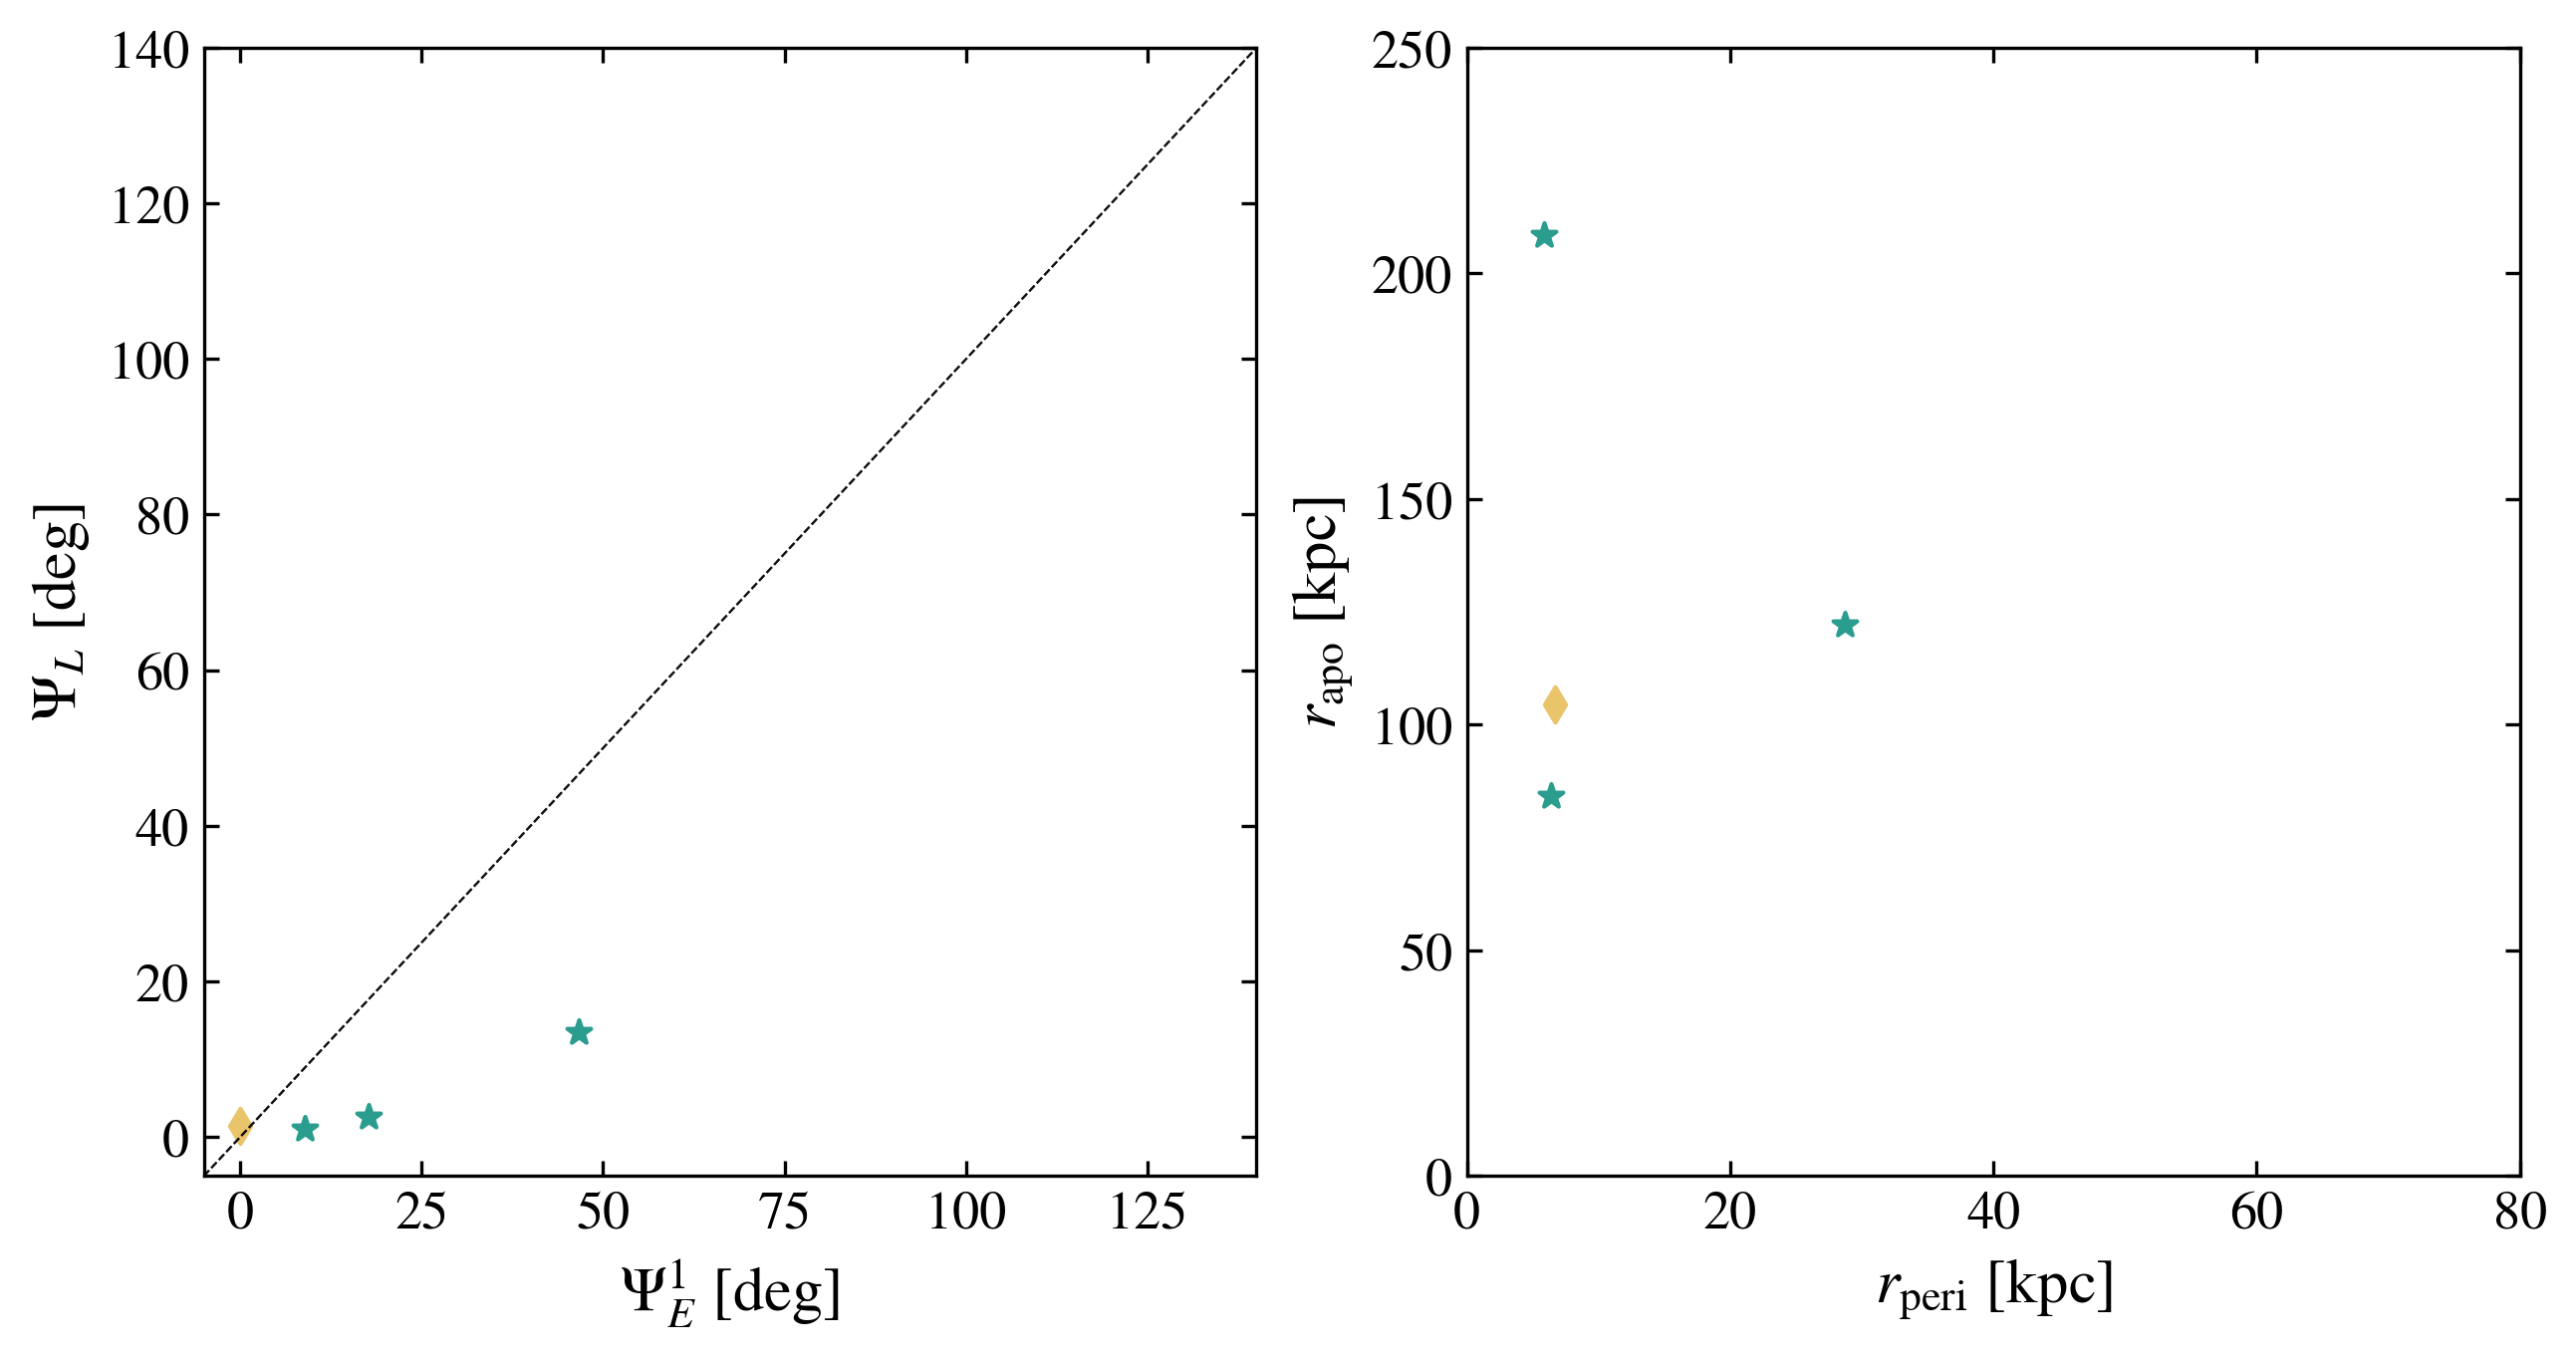

In [8]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams.update({'font.family':'cmr10','font.size': 13})
matplotlib.rcParams['axes.unicode_minus']=False
matplotlib.rcParams['axes.labelsize']=15
plt.rcParams['figure.dpi'] = 300
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
matplotlib.rcParams.update({
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    })
fig, ax= plt.subplots(nrows = 1, ncols = 2, sharex=False , sharey=False,figsize=(10,5))
for sub_i in range(len(subs.id_sat_stream)):
    if subs.id_sat_stream[sub_i] == 0:
        marker = 'o'
        color = '#264653'
    elif subs.id_sat_stream[sub_i] == 1:
        marker = '*'
        color = '#2a9d8f'
    elif subs.id_sat_stream[sub_i] == 2:
        marker = 'd'
        color = '#e9c46a'
    ax[0].scatter(np.rad2deg(subs.PE_list[sub_i]), np.rad2deg(subs.PL_list[sub_i]), marker = marker, color = color)
    low_psiEL = -5
    high_psiEL = 140
    ax[0].plot( [low_psiEL,high_psiEL],[low_psiEL,high_psiEL] , color = 'black', linestyle = 'dashed', linewidth = 0.5, alpha = 0.5)
    ax[0].set_xlim([low_psiEL,high_psiEL])
    ax[0].set_ylim([low_psiEL,high_psiEL])
    ax[0].set_xlabel(r'$\Psi^1_E$ [deg]')
    ax[0].set_ylabel(r'$\Psi_L$ [deg]')

    ax[1].scatter(subs.peri_all_reintegrate[sub_i], subs.apo_all_reintegrate[sub_i], marker = marker, color = color)
    ax[1].set_ylim([0,250])#200
    ax[1].set_xlim([0,80])#50
    ax[1].set_xlabel(r'$r_{\mathrm{peri}}$ [kpc]')
    ax[1].set_ylabel(r'$r_{\mathrm{apo}}$ [kpc]')